In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor

In [3]:
from models.segmentation import SegModel

In [4]:
height = 256
width = 256

In [5]:
transform = transforms.Compose([
                    transforms.Resize((height, width)),
                    transforms.ToTensor(),
                ])

In [6]:
img_path = './imgs/MEN-Denim-id_00000080-01_7_additional.jpeg'

img = Image.open(img_path).convert('RGB')
img = transform(img).unsqueeze(0)

img2 = F.interpolate(img, size=(1101,750), mode='bicubic', align_corners=True)

In [7]:
img2.shape

torch.Size([1, 3, 1101, 750])

In [8]:
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [9]:
model_segm = SegModel('./models/pre_trained_models/checkpoint_0040_DeepLabV3_Fashion_Men.pth').to(device)

In [10]:
bg, body, head = model_segm.forward(img2.to(device))


In [11]:
head2 = F.interpolate(head, size=(256,256), mode='nearest')
body2 = F.interpolate(body, size=(256,256), mode='nearest')

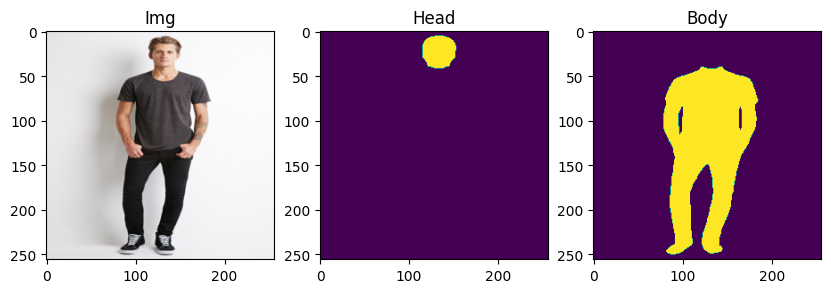

In [12]:
#Sample display
fig, axs = plt.subplots(1, 3, figsize=(10, 14))

# Display the LR and HR images using matplotlib
axs[0].imshow(img.squeeze(0).permute((1,2,0)))
axs[0].set_title('Img')
axs[1].imshow(head2.squeeze(0).squeeze(0).detach().cpu()>0.5)
axs[1].set_title('Head')
axs[2].imshow(body2.squeeze(0).squeeze(0).detach().cpu()>0.5)
axs[2].set_title('Body')

plt.show()


In [13]:
body.min()

tensor(1.6245e-05, device='cuda:0', grad_fn=<MinBackward1>)

In [14]:
body.max()

tensor(1.0000, device='cuda:0', grad_fn=<MaxBackward1>)